In [1]:
import xgboost as xgb

In [2]:
from sdgym import load_dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [4]:
from synthsonic.models.kde_utils import kde_smooth_peaks_1dim, kde_smooth_peaks
from sklearn.model_selection import train_test_split

In [5]:
%matplotlib inline

In [6]:
data = pd.read_csv('train.csv')

In [7]:
categorical_columns = ['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin']

In [8]:
df = data[categorical_columns]

In [9]:
import pgmpy

In [10]:
from pgmpy.models import BayesianModel
from pgmpy.estimators import TreeSearch

In [11]:
from pgmpy.estimators import HillClimbSearch, BicScore, ExhaustiveSearch, PC

In [20]:
if True:
    # learn graph structure 
    est = TreeSearch(df, root_node=df.columns[0])
    dag = est.estimate(class_node='ps_ind_02_cat', estimator_type="tan") 


  0%|          | 0/1035.0 [00:00<?, ?it/s]
Building tree:   0%|          | 0/1035.0 [00:00<?, ?it/s]
Building tree:   2%|▏         | 24/1035.0 [00:00<00:15, 67.35it/s]
Building tree:   3%|▎         | 36/1035.0 [00:00<00:21, 47.45it/s]
Building tree:   5%|▍         | 48/1035.0 [00:01<00:25, 38.33it/s]
Building tree:   6%|▌         | 60/1035.0 [00:01<00:27, 35.34it/s]
Building tree:   7%|▋         | 72/1035.0 [00:02<00:28, 33.39it/s]
Building tree:   8%|▊         | 84/1035.0 [00:02<00:30, 31.40it/s]
Building tree:   9%|▉         | 96/1035.0 [00:02<00:31, 29.38it/s]
Building tree:  10%|▉         | 99/1035.0 [00:03<00:32, 28.37it/s]
Building tree:  10%|█         | 108/1035.0 [00:03<00:31, 29.43it/s]
Building tree:  12%|█▏        | 120/1035.0 [00:03<00:29, 31.30it/s]
Building tree:  13%|█▎        | 132/1035.0 [00:04<00:28, 31.14it/s]
Building tree:  13%|█▎        | 136/1035.0 [00:04<00:26, 33.35it/s]
Building tree:  14%|█▎        | 140/1035.0 [00:04<00:30, 29.32it/s]
Building tree:  14%|█▍

In [13]:
if False:
    # alternative graph structure 
    est2 = TreeSearch(df, root_node=df.columns[0])
    dag = est2.estimate(estimator_type="chow-liu")

In [16]:
if False:
    est = HillClimbSearch(df, use_cache=True)
    dag = est.estimate(start_dag=dag)

In [17]:
if True:
    est = PC(df)
    dag = est.estimate(start_dag=dag)

Working for n conditional variables: 0:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

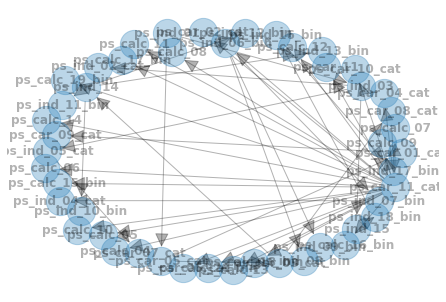

In [19]:
nx.draw(dag, with_labels=True, arrowsize=30, node_size=800, alpha=0.3, font_weight='bold')
plt.show()

In [16]:
edges = dag.edges()

In [17]:
edges

OutEdgeView([('ps_ind_01', 'ps_car_05_cat'), ('ps_ind_01', 'ps_ind_03'), ('ps_car_05_cat', 'ps_car_03_cat'), ('ps_car_05_cat', 'ps_car_01_cat'), ('ps_ind_03', 'ps_ind_05_cat'), ('ps_ind_03', 'ps_ind_15'), ('ps_car_03_cat', 'ps_car_08_cat'), ('ps_car_03_cat', 'ps_ind_14'), ('ps_car_01_cat', 'ps_car_09_cat'), ('ps_ind_05_cat', 'ps_car_07_cat'), ('ps_ind_15', 'ps_ind_18_bin'), ('ps_car_08_cat', 'ps_car_11_cat'), ('ps_ind_14', 'ps_ind_12_bin'), ('ps_ind_14', 'ps_ind_11_bin'), ('ps_ind_14', 'ps_ind_13_bin'), ('ps_ind_14', 'ps_ind_10_bin'), ('ps_ind_18_bin', 'ps_ind_16_bin'), ('ps_car_11_cat', 'ps_car_06_cat'), ('ps_car_11_cat', 'ps_car_11'), ('ps_car_11_cat', 'ps_car_04_cat'), ('ps_car_11_cat', 'ps_car_02_cat'), ('ps_car_11_cat', 'ps_ind_06_bin'), ('ps_car_11_cat', 'ps_car_10_cat'), ('ps_car_11_cat', 'ps_calc_10'), ('ps_car_11_cat', 'ps_calc_14'), ('ps_car_11_cat', 'ps_calc_11'), ('ps_car_11_cat', 'ps_calc_13'), ('ps_car_11_cat', 'ps_calc_08'), ('ps_car_11_cat', 'ps_calc_12'), ('ps_car_11_c

In [18]:
from pgmpy.estimators import BayesianEstimator

# there are many choices of parametrization, here is one example
model = BayesianModel(dag.edges())
model.fit(df, estimator=BayesianEstimator, prior_type='dirichlet', pseudo_counts=0.1)


In [19]:
len(df)

595212

In [20]:
columns = sorted(df.columns)

In [21]:
data = df[columns].values

In [22]:
# set up train-test sample.
# the test sample is used to calibrate the output of the classifier

In [23]:
X1_train, X1_test, y1_train, y1_test = train_test_split(data, np.ones(data.shape[0]), test_size=0.35,
                                                        random_state=0)



In [24]:
X1_train.shape

(386887, 47)

In [25]:
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
clf=MLPClassifier(random_state=0, max_iter=1000, early_stopping=True)

In [63]:
clf = xgb.XGBClassifier(max_depth=2)

if True:
    clf = xgb.XGBClassifier(
        n_estimators=250,
        reg_lambda=1,
        gamma=0,
        max_depth=9
    )

In [85]:
clf = SVC(probability=True)

In [88]:
clf = LogisticRegression()

In [29]:
import inspect

In [30]:
argspecs = inspect.getfullargspec(clf.fit)

In [31]:
support_weight = 'sample_weight' in argspecs.args

In [32]:
n_one = len(X1_train)
n_zero = n_one

In [33]:
from pgmpy.sampling import BayesianModelSampling

# sample data from BN

#np.random.seed(seed)

inference = BayesianModelSampling(model)
df_data = inference.forward_sample(size=n_zero, return_type='dataframe')

#df_data.columns = [int(c) for c in df_data.columns]

Generating for node: ps_ind_01:   0%|          | 0/47 [00:00<?, ?it/s]    /Users/maxbaak/Projects/pgmpy/pgmpy/factors/discrete/DiscreteFactor.py:517: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  warn(
Generating for node: ps_car_06_cat: 100%|██████████| 47/47 [02:19<00:00,  2.96s/it] 


In [34]:
X0_train = df_data[columns].values

In [35]:
X0_train

array([[2, 1, 8, ..., 1, 0, 0],
       [5, 1, 7, ..., 1, 0, 0],
       [4, 1, 7, ..., 1, 0, 0],
       ...,
       [3, 6, 7, ..., 1, 0, 0],
       [1, 4, 8, ..., 0, 0, 0],
       [1, 2, 6, ..., 0, 0, 1]])

In [36]:
X1_train

array([[2, 4, 6, ..., 0, 1, 0],
       [2, 2, 8, ..., 1, 0, 0],
       [1, 4, 7, ..., 1, 0, 0],
       ...,
       [4, 3, 4, ..., 0, 0, 1],
       [3, 0, 8, ..., 1, 0, 0],
       [1, 1, 6, ..., 0, 0, 1]])

In [37]:
zeros = np.zeros(n_zero)
ones = np.ones(n_one)

yy = np.concatenate([zeros, ones], axis = 0)
XX = np.concatenate([X0_train, X1_train], axis = 0)

In [64]:
clf = clf.fit(XX, yy)

/Users/maxbaak/opt/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:10:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [39]:
# calibrate the probabilities, using the test sample and a new null sample

In [40]:
df_data = inference.forward_sample(size=500000, return_type='dataframe', seed=10)

if False:
    df_data.columns = [int(c) for c in df_data.columns]
    X = df_data[sorted(df_data.columns)].values
X0_test = df_data[columns].values

Generating for node: ps_car_06_cat: 100%|██████████| 47/47 [03:01<00:00,  3.86s/it] 


In [148]:
p0 = clf.predict_proba(X0_test)[:, 1]
p2 = clf.predict_proba(X1_test)[:, 1]

In [149]:
len(p0), len(p2)

(500000, 208325)

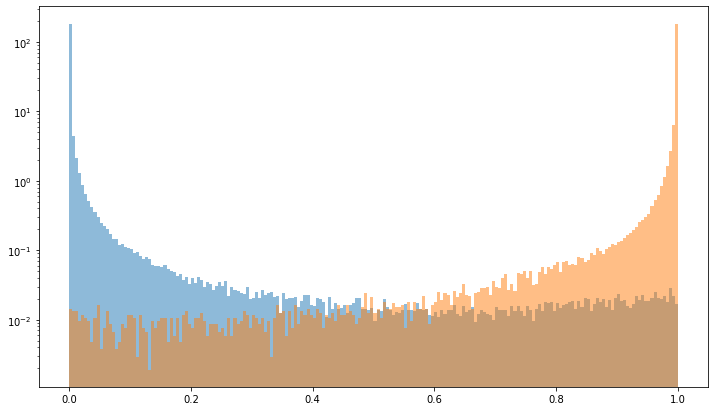

In [150]:
nbins = 200
plt.figure(figsize=(12,7))
plt.hist(p0, bins=nbins, range=(0,1), alpha=0.5, log=True, density=True) 
plt.hist(p2, bins=nbins, range=(0,1), alpha=0.5, log=True, density=True); 


In [153]:
nbins = 200
binning = np.linspace(0, 1, nbins+1)

hist_p0, bin_edges = np.histogram(p0, binning)
hist_p1, bin_edges = np.histogram(p2, binning)

def poisson_uncertainty(n):
    sigman = np.sqrt(n)
    # correct poisson counts of zero.
    sigman[sigman == 0] = 1.
    return sigman

def fraction_and_uncertainty(a, b, sigma_a, sigma_b):
    frac_a = a / (a + b)
    frac_b = b / (a + b)
    sigma_fa2 = np.power(frac_b * sigma_a, 2) / np.power(a + b, 2)  +  np.power(frac_a * sigma_b, 2) / np.power(a + b, 2)
    return frac_a, np.sqrt(sigma_fa2)

rest_p0 = np.sum(hist_p0) - hist_p0
rest_p1 = np.sum(hist_p1) - hist_p1

sigma_bin0 = poisson_uncertainty(hist_p0)
sigma_rest0 = poisson_uncertainty(rest_p0)

sigma_bin1 = poisson_uncertainty(hist_p1)
sigma_rest1 = poisson_uncertainty(rest_p1)

frac0, sigma_frac0 = fraction_and_uncertainty(hist_p0, rest_p0, sigma_bin0, sigma_rest0)
frac1, sigma_frac1 = fraction_and_uncertainty(hist_p1, rest_p1, sigma_bin1, sigma_rest1)

p1calib, sigma_p1calib = fraction_and_uncertainty(frac1, frac0, sigma_frac1, sigma_frac0)

sample_weight = 1 / (sigma_p1calib * sigma_p1calib)

sample_weight /= min(sample_weight)

sample_weight

array([2.11797854e+07, 1.35031292e+04, 3.09811347e+03, 1.58141144e+03,
       6.34198930e+02, 3.85676400e+02, 2.67326418e+02, 3.51988827e+02,
       1.16869387e+02, 6.02116362e+01, 1.54088114e+02, 6.62364552e+01,
       3.43318726e+01, 3.59428657e+01, 3.45089738e+01, 5.41436057e+01,
       3.15288915e+01, 2.05525468e+01, 1.82037616e+01, 1.34431442e+01,
       1.21673275e+01, 1.03462804e+01, 3.12756265e+01, 8.53299541e+00,
       9.37539675e+00, 1.14336500e+01, 2.83740409e+01, 6.01346283e+00,
       6.33268056e+00, 5.66245071e+00, 5.09106946e+00, 5.78800897e+00,
       7.47531556e+00, 4.29803626e+00, 5.51481156e+00, 3.36633199e+00,
       5.62151296e+00, 2.80598491e+00, 3.08800664e+00, 2.55523028e+00,
       3.53505713e+00, 2.59582398e+00, 3.32507953e+00, 2.77552843e+00,
       2.27968889e+00, 3.23814239e+00, 2.59508624e+00, 1.99977590e+00,
       2.36121469e+00, 3.06793912e+00, 2.47461711e+00, 3.46685188e+00,
       1.66348928e+00, 2.55119961e+00, 2.03319378e+00, 1.96560727e+00,
      

In [235]:
frac0

array([9.16362e-01, 2.22360e-02, 1.05880e-02, 6.38000e-03, 4.38200e-03,
       3.25400e-03, 2.57200e-03, 2.11400e-03, 1.74800e-03, 1.49600e-03,
       1.24200e-03, 1.11400e-03, 1.00400e-03, 8.46000e-04, 7.38000e-04,
       7.22000e-04, 6.02000e-04, 6.20000e-04, 5.50000e-04, 5.46000e-04,
       5.14000e-04, 4.50000e-04, 4.72000e-04, 4.12000e-04, 3.74000e-04,
       3.98000e-04, 3.70000e-04, 3.08000e-04, 2.94000e-04, 2.96000e-04,
       2.84000e-04, 3.10000e-04, 2.70000e-04, 2.52000e-04, 2.42000e-04,
       2.10000e-04, 2.28000e-04, 1.84000e-04, 2.04000e-04, 1.62000e-04,
       2.00000e-04, 1.70000e-04, 2.08000e-04, 1.84000e-04, 1.50000e-04,
       1.72000e-04, 1.64000e-04, 1.32000e-04, 1.52000e-04, 1.74000e-04,
       1.54000e-04, 1.80000e-04, 1.10000e-04, 1.46000e-04, 1.36000e-04,
       1.30000e-04, 1.20000e-04, 1.18000e-04, 1.46000e-04, 1.00000e-04,
       1.04000e-04, 1.26000e-04, 1.02000e-04, 1.34000e-04, 1.12000e-04,
       1.20000e-04, 1.24000e-04, 1.06000e-04, 1.10000e-04, 6.200

In [234]:
frac1

array([7.20028801e-05, 6.72026881e-05, 6.72026881e-05, 4.80019201e-05,
       5.76023041e-05, 5.28021121e-05, 4.80019201e-05, 2.40009600e-05,
       5.28021121e-05, 8.16032641e-05, 1.92007680e-05, 3.84015361e-05,
       6.72026881e-05, 4.32017281e-05, 3.36013441e-05, 1.92007680e-05,
       2.40009600e-05, 4.32017281e-05, 3.84015361e-05, 5.76023041e-05,
       5.76023041e-05, 5.28021121e-05, 1.44005760e-05, 5.76023041e-05,
       3.84015361e-05, 3.36013441e-05, 9.60038402e-06, 4.80019201e-05,
       3.84015361e-05, 4.80019201e-05, 5.28021121e-05, 5.28021121e-05,
       2.40009600e-05, 5.28021121e-05, 2.88011520e-05, 5.28021121e-05,
       2.40009600e-05, 5.76023041e-05, 6.72026881e-05, 4.32017281e-05,
       3.84015361e-05, 5.28021121e-05, 5.28021121e-05, 6.24024961e-05,
       4.80019201e-05, 2.88011520e-05, 4.32017281e-05, 4.32017281e-05,
       4.32017281e-05, 3.36013441e-05, 3.84015361e-05, 2.88011520e-05,
       5.28021121e-05, 2.88011520e-05, 5.28021121e-05, 4.32017281e-05,
      

In [236]:
8.40000e-05 * 6207

0.521388

In [204]:
np.sqrt(hist_p0[-1]) / hist_p0[-1]

0.1543033499620919

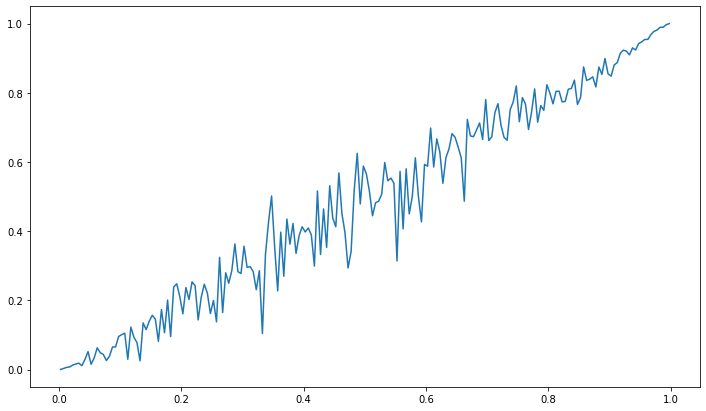

In [156]:
plt.figure(figsize=(12,7))
plt.plot(bin_centers, p1calib)

In [157]:
from sklearn.isotonic import IsotonicRegression
from scipy import interpolate

In [167]:
# we recalibrate per probability bin. NO interpolation (not valid in highest bin)

#hist_p0, bin_edges = np.histogram(p0, bins=nbins, range=(0, 1))
#hist_p1, bin_edges = np.histogram(p2, bins=nbins, range=(0, 1)) #### !!!! p2
bin_centers = bin_edges[:-1] + 0.5/nbins

hnorm_p0 = hist_p0 / sum(hist_p0)
hnorm_p1 = hist_p1 / sum(hist_p1)
hnorm_sum = hnorm_p0 + hnorm_p1
p1cb = np.divide(hnorm_p1, hnorm_sum, out=np.zeros_like(hnorm_p1), where=hnorm_sum != 0)
# self.p1cb = p1cb, bin_centers

# use isotonic regression to smooth out potential fluctuations in the p1 values
# isotonic regression assumes that p1 can only be a rising function.
# I’m assuming that if a classifier predicts a higher probability, the calibrated probability
# will also be higher. This may not always be right, but I think generally it is a safe one.
iso_reg = IsotonicRegression(y_min=0, y_max=1).fit(bin_centers, p1calib, sample_weight)
p1pred = iso_reg.predict(bin_centers)

p1f_ = interpolate.interp1d(bin_edges[:-1], p1pred, kind='previous', bounds_error=False, fill_value="extrapolate")

p1pred = p1f_(bin_centers)

In [211]:
p1pred[-1] = 0.9998389328412737

p1f_ = interpolate.interp1d(bin_edges[:-1], p1pred, kind='previous', bounds_error=False, fill_value="extrapolate")

p1pred = p1f_(bin_centers)

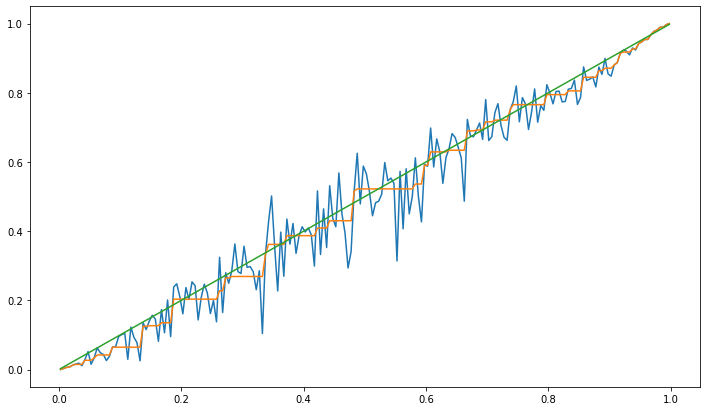

In [212]:
plt.figure(figsize=(12,7))
plt.plot(bin_centers, p1cb)
plt.plot(bin_centers, p1pred)
plt.plot(bin_centers, bin_centers)
#plt.plot(bin_centers, p1lin)

In [213]:
x = np.linspace(0.9,1,500)

In [214]:
pp = p1f_(x)

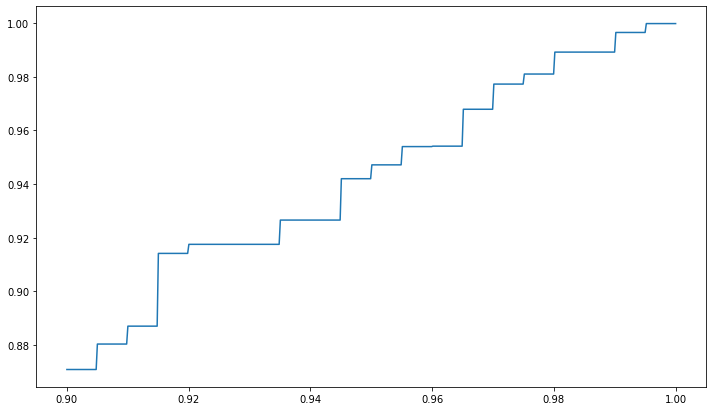

In [215]:
plt.figure(figsize=(12,7))
#plt.plot(bin_centers, p1cb)
plt.plot(x, pp)

In [216]:
maxp1 = p1f_(0.999)
maxp1

array(0.99983893)

In [217]:
maxp2 = p1f_(0.991)
maxp2

array(0.9965226)

In [218]:
max_weight = maxp1 / (1. - maxp1)
max_weight

6207.590304241589

In [219]:
sw = p1f_(0.991) / (1. - p1f_(0.991))
sw

286.57146285851354

In [220]:
# validation - part 1: check if reweighting works okay

In [53]:
from pgmpy.sampling import BayesianModelSampling

# sample data from BN
inference = BayesianModelSampling(model)

df_data = inference.forward_sample(size=250000, return_type='dataframe', seed=1)

#df_data.columns = [int(c) for c in df_data.columns]

X = df_data[columns].values

Generating for node: ps_ind_01:   0%|          | 0/47 [00:00<?, ?it/s]    /Users/maxbaak/Projects/pgmpy/pgmpy/factors/discrete/DiscreteFactor.py:517: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  warn(
Generating for node: ps_car_06_cat: 100%|██████████| 47/47 [01:28<00:00,  1.88s/it] 


In [221]:
p0 = clf.predict_proba(X)[:, 1]
nominator = p1f_(p0)
denominator = 1 - nominator
weight = np.divide(nominator, denominator, out=np.ones_like(nominator), where=denominator != 0)

In [222]:
len(X), sum(weight)

(250000, 250000.00000103982)

In [223]:
keep = weight == max_weight
same = weight != max_weight

In [224]:
np.sum(weight[same]), np.sum(weight[keep]), 

(26526.749047327834, 223473.25095269727)

In [197]:
ratio = (250000 - np.sum(weight[same])) / np.sum(weight[keep])

<ipython-input-197-c8eac373052c>:1: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = (250000 - np.sum(weight[same])) / np.sum(weight[keep])


In [198]:
weight[keep] = weight[keep] * ratio

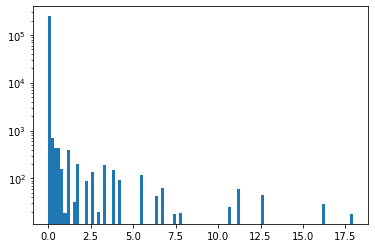

In [225]:
plt.hist(weight[weight < 20], bins=100, log=True);

In [226]:
max_weight = max(weight)

In [227]:
max_weight

6207.590304241589

In [228]:
max_weight / (1 + max_weight)

0.9998389328412737

In [237]:
sum(weight)

250000.00000103982

In [230]:
from random import choices

In [231]:
#data, sample_weights = self._sample_no_transform(n_samples, random_state)
pop = np.asarray(range(X.shape[0]))
probs = weight/np.sum(weight)
sample = choices(pop, probs, k=X.shape[0])
Xtrans = X[sample]


In [232]:
p0 = clf.predict_proba(Xtrans)[:, 1]
p2 = clf.predict_proba(X1_test)[:, 1]


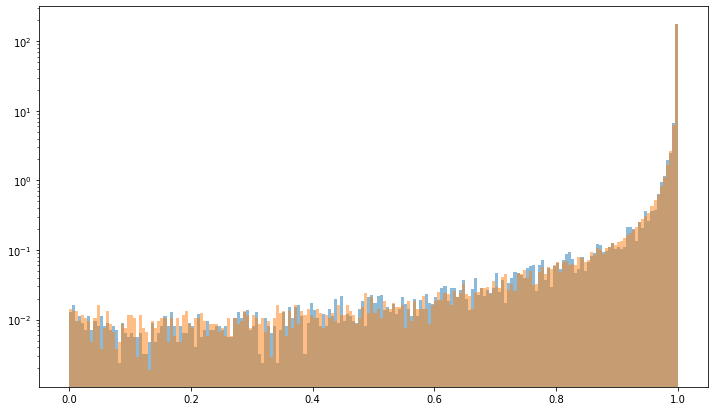

In [233]:
plt.figure(figsize=(12,7))
plt.hist(p0, bins=200, range=(0,1), alpha=0.5, density=True, log=True) #, weights=weight)#, log=True)
plt.hist(p2, bins=200, range=(0,1), alpha=0.5, density=True, log=True);


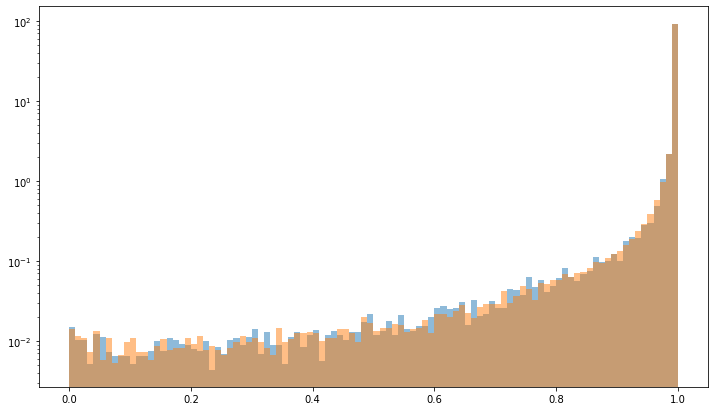

In [189]:
plt.figure(figsize=(12,7))
plt.hist(p0, bins=100, range=(0,1), alpha=0.5, density=True, log=True) #, weights=weight)#, log=True)
plt.hist(p2, bins=100, range=(0,1), alpha=0.5, density=True, log=True);


In [137]:
# validation - part 2: plot distributions

(array([26.57688625,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

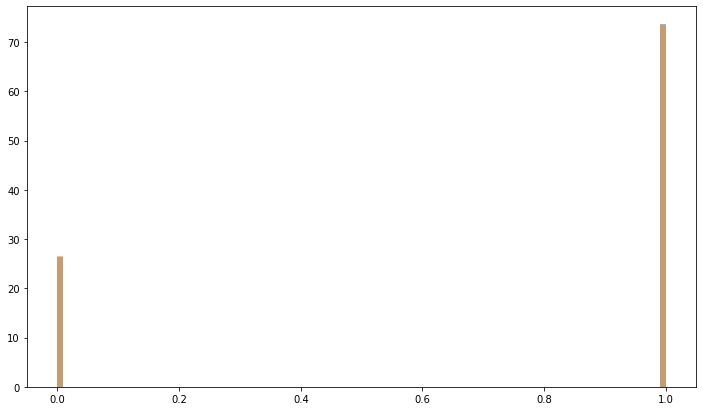

In [238]:
i = 1
plt.figure(figsize=(12,7))
plt.hist(X[:, i], bins=100, range=(0,1), alpha=0.5, density=True)#, log=True)
plt.hist(X1_test[:, i], bins=100, range=(0,1), alpha=0.5, density=True)


In [239]:
# validation part 3: check number of duplicates

In [65]:
df_data = inference.forward_sample(size=500000, return_type='dataframe', seed=2)
#df_data.columns = [int(c) for c in df_data.columns]
X10k = df_data[columns].values

Generating for node: 2: 100%|██████████| 37/37 [00:45<00:00,  1.24s/it] 


In [66]:
p0 = clf.predict_proba(X10k)[:, 1]
nominator = p1f_(p0)
denominator = 1 - nominator
weight = np.divide(nominator, denominator, out=np.ones_like(nominator), where=denominator != 0)

In [67]:
sum(weight)

493328.3794656135

In [68]:
pop = np.asarray(range(X10k.shape[0]))
probs = weight/np.sum(weight)
sample = choices(pop, probs, k=X10k.shape[0])
Xtrans = X10k[sample]


In [249]:
#u, c = np.unique(Xtrans, axis=0, return_counts=True)
u, c = np.unique(Xtrans, axis=0, return_counts=True)

In [253]:
counts = np.sort(c)[::-1] 

In [254]:
counts

array([6397, 6368, 6361, ...,    1,    1,    1])

In [255]:
u, c = np.unique(data, axis=0, return_counts=True)

In [256]:
c2 = np.sort(c)[::-1] 

In [257]:
c2

array([1, 1, 1, ..., 1, 1, 1])

<BarContainer object of 40 artists>

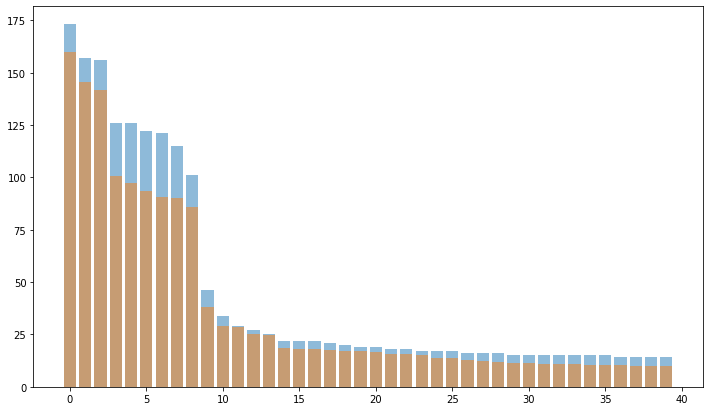

In [80]:
plt.figure(figsize=(12,7))
plt.bar(list(range(40)), c2[:40], alpha=0.5)
plt.bar(list(range(40)), counts[:40], alpha=0.5)


<BarContainer object of 40 artists>

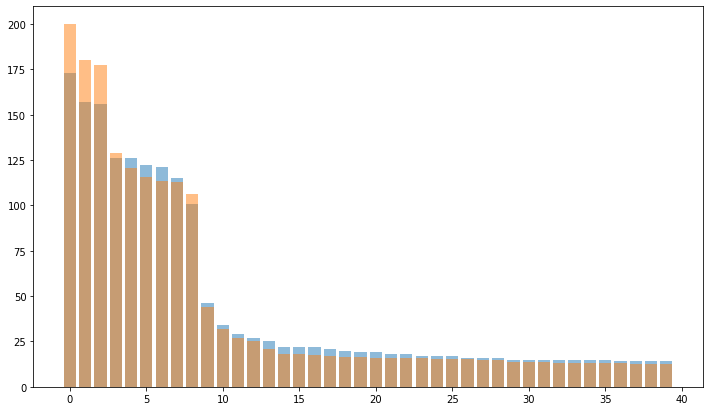

In [74]:
plt.figure(figsize=(12,7))
plt.bar(list(range(40)), c2[:40], alpha=0.5)
plt.bar(list(range(40)), counts[:40], alpha=0.5)


In [77]:
import numpy as np
import pandas as pd
from sdgym import benchmark
from sdgym import load_dataset
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from synthsonic.models.kde_copula_nn_pdf import KDECopulaNNPdf
from synthsonic.models.categorical_utils import categorical_round, vec_translate, categorical_frequency_mapping, \
            categorical_frequency_inverse_mapping, encode_one_hot, decode_one_hot
from timeit import default_timer as timer
import xgboost as xgb
from sklearn.decomposition import PCA
%matplotlib inline

from functools import partial

In [78]:

df = pd.DataFrame(Xtrans)
df.to_csv('test.csv', index=False)


In [79]:
def KDECopulaNNPdf_RoundCategorical(real_data, categorical_columns, ordinal_columns, times=None):
    df = pd.read_csv('test.csv')
    data = df.values[:25000]
    return data

In [85]:
alarm_times = []
alarm_thing = partial(KDECopulaNNPdf_RoundCategorical)
alarm_thing.__name__ = KDECopulaNNPdf_RoundCategorical.__name__


In [86]:
alarm_scores = benchmark(synthesizers=[alarm_thing], datasets=['alarm'])

TypeError: 'module' object is not callable

In [82]:
alarm_scores

NameError: name 'alarm_scores' is not defined

In [84]:
if True:
    alarm_scores = benchmark(synthesizers=[alarm_thing], datasets=['alarm'])
    alarm_scores.drop(columns=['timestamp'], inplace=True)
    exec_time = ['N/A'] * 9 + [round(np.mean(alarm_times), 2)]
    alarm_scores['alarm/exec_time(s)'] = exec_time    

TypeError: 'module' object is not callable